In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("train.csv")

In [68]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
df.shape

(891, 12)

In [70]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
df.isnull().sum(axis = 0) #eksik sayisini bulmak için

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
# eksik verileri doldurma ve gerksiz verileri silme
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [73]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [74]:
df.Sex.value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [75]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [76]:
deaths_by_gender = df[df.Survived == 0].Sex.value_counts()
survivors_by_gender = df[df.Survived == 1].Sex.value_counts()

In [77]:
deaths_by_gender

male      468
female     81
Name: Sex, dtype: int64

In [78]:
survivors_by_gender

female    233
male      109
Name: Sex, dtype: int64

In [79]:
deaths_by_class = df[df.Survived == 0].Pclass.value_counts()
survivors_by_class = df[df.Survived == 1].Pclass.value_counts()

In [80]:
deaths_by_class

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [81]:
survivors_by_class

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [83]:
obj = df.groupby("Survived")
obj.describe()

Pclass                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
Survived                                                              
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0  549.0   
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0  342.0   

                     ... Parch        Fare                             \
               mean  ...   75%  max  count       mean        std  min   
Survived             ...                                                
0         30.028233  ...   0.0  6.0  549.0  22.117887  31.388207  0.0   
1         28.291433  ...   1.0  5.0  342.0  48.395408  66.596998  0.0   

                                         
              25%   50%   75%       max  
Survived                                 
0          7.8542  10.5  26.0  263.0000  
1         12.4750  26.0  57.0  512.3292  

[2 rows x 40 columns]

Text(0.5, 1.0, 'Ücret ve Hayatta Kalma İlişkisi')

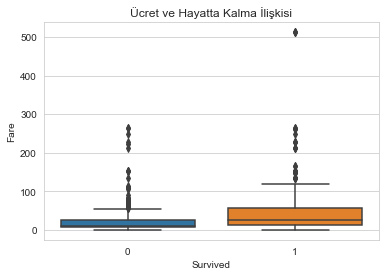

In [88]:
import seaborn as sns
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Ücret ve Hayatta Kalma İlişkisi')

Text(0.5, 1.0, 'Yaş Dağılımı')

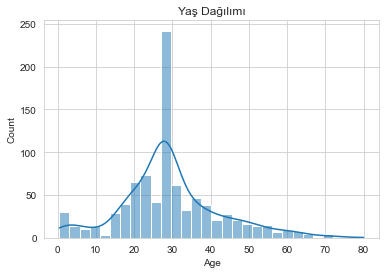

In [89]:
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Yaş Dağılımı')

Text(0.5, 1.0, 'Hayatta Kalma Durumu - Sınıf')

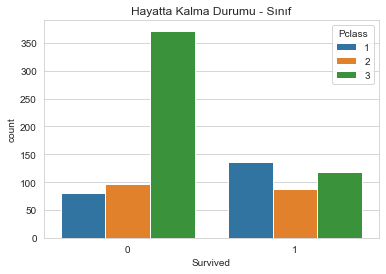

In [91]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Hayatta Kalma Durumu - Sınıf')

Text(0.5, 1.0, 'Hayatta Kalma Durumu - Cinsiyet')

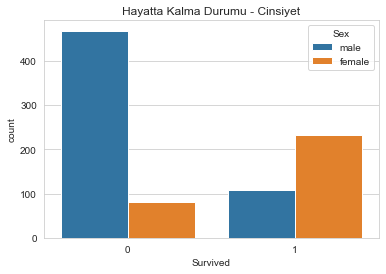

In [93]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Hayatta Kalma Durumu - Cinsiyet')

Text(0, 0.5, 'Yaş')

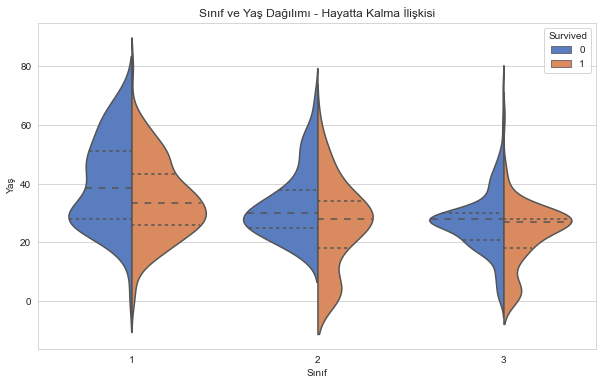

In [94]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, inner='quart', palette='muted')
plt.title('Sınıf ve Yaş Dağılımı - Hayatta Kalma İlişkisi')
plt.xlabel('Sınıf')
plt.ylabel('Yaş')

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [99]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [100]:
X = df.drop('Survived', axis=1) # bagimsiz degisken
y = df['Survived']#bagimli degisken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
#veriyi olceklemek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Modeli oluşturma ve train etme islemi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_pred = model.predict(X_test_scaled) # tahmin yapilir

In [104]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [105]:
accuracy

0.7982062780269058

In [106]:
report

'              precision    recall  f1-score   support\n\n           0       0.83      0.84      0.83       134\n           1       0.75      0.74      0.75        89\n\n    accuracy                           0.80       223\n   macro avg       0.79      0.79      0.79       223\nweighted avg       0.80      0.80      0.80       223\n'